In [2]:
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import StandardScaler,RobustScaler
# pd.options.display.max_rows=50
# pd.options.display.max_columns=90

In [3]:
# Importing the data

X_train_original=pd.read_csv('X_train_J01Z4CN.csv') 
Y_train_original=pd.read_csv('y_train_OXxrJt1.csv')

# Since we don't need Id for training we can drop it
X_train_id=X_train_original.drop(columns="id_annonce")
Y_train_id=Y_train_original.drop(columns="id_annonce")

# Lets Import the Test data of X
X_test_original=pd.read_csv('X_test_BEhvxAN.csv')

X_test_id=X_test_original.drop(columns="id_annonce")


In [4]:

# We will Id for next using
X_test_idsdata=X_test_original["id_annonce"]
X_test_idsdata.to_pickle("X_test_ids.pkl")

In [5]:
X_train_original

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,...,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,...,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,35881571,appartement,43.480292,-1.484324,bayonne,64100,2995.0,NaN,NaN,255.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37364,35890109,appartement,48.861391,2.401158,paris-20eme,75020,36.0,4.0,NaN,229.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37365,36010245,appartement,44.397837,-1.164312,biscarrosse,40600,99.0,2.0,NaN,NaN,...,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37366,35864579,duplex,48.864204,2.808693,magny-le-hongre,77700,9281.0,NaN,NaN,NaN,...,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# X_train_original.describe().T.style.background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['mean'], cmap='Blues')

In [7]:
# X_test_original.describe().T.style.background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['mean'], cmap='Blues')

In [8]:
categorical_features = ["property_type","city","energy_performance_category","ghg_category","exposition", "postal_code"]
numerical_features = ["approximate_latitude", "approximate_longitude","size", "floor","land_size","energy_performance_value","ghg_value","nb_rooms","nb_bedrooms","nb_bathrooms","nb_parking_places","nb_boxes","nb_photos","nb_terraces"]
boolean_features = ["has_a_cellar","has_a_garage", "has_air_conditioning", "last_floor", "upper_floors"]

In [9]:
# Train set features cardinality
train_cardinality = (pd.Series({feature: len(X_train_original[feature].unique()) for feature in X_train_original[categorical_features]})
                     .reset_index().rename(columns={'index':'Feature',0:'Cardinality'}))
sb.set(rc={"figure.figsize":(5, 6)})

# Test set features cardinality
test_cardinality = (pd.Series({feature: len(X_test_original[feature].unique()) for feature in X_test_original[categorical_features]})
                     .reset_index().rename(columns={'index':'Feature',0:'Cardinality'}))
sb.set(rc={"figure.figsize":(5, 6)})
(pd.merge(train_cardinality,test_cardinality, on='Feature', how='left')
 .sort_values(by=['Cardinality_x', 'Cardinality_y'], ascending=[False,False])
 .rename(columns={'Cardinality_x':'Train Cardinality','Cardinality_y':'Test Cardinality'}))

,Feature,Train Cardinality,Test Cardinality
1,city,8643,3833
5,postal_code,4726,2964
0,property_type,22,20
4,exposition,13,13
2,energy_performance_category,8,8
3,ghg_category,8,8


In [10]:
# (pd.Series(X_train_original.isna().sum()/len(X_train_original.index)*100).reset_index().
#     rename(columns={'index':'Feature',0:'Missing_Values'}).
#     sort_values(by=['Missing_Values'], ascending=[False]))

In [11]:
# report=create_report(X_train_0, title='Training Data Report')
# report.show_browser()
# report=create_report(X_test_0, title='Training Data Report')
# report.show_browser()


In [12]:
# Data Cleaning Started

data = pd.concat([X_train_id, X_test_id], axis=0).reset_index(drop=True)
# Dropping the columns
data_0=data.drop(columns=["energy_performance_category", "ghg_category"])

In [13]:
# Frequency encoding
df = data.copy()
fq = df.groupby(['city']).size()/len(df)

# mapping values to dataframe
df.loc[:, "{}_freq_encode".format('city')] = df['city'].map(fq)

# drop original column.
df = df.drop(['city'], axis=1)
df = df.rename(columns={"city_freq_encode":"city"})
data_1=df.copy()

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer
from lightgbm import LGBMRegressor
iter_mean = IterativeImputer(estimator=LGBMRegressor(), random_state=0)
data_11=data_1.copy()
# iter_mean.fit(data_1)
# data_2=iter_mean.transform(data_1)
data_2=pd.DataFrame(data, index=data_0.index, columns=data_11.columns)

In [15]:
#Set floor value to 0 for all property types that are not appartements
data_2.loc[(data_2['property_type']!="appartement") & data_2['floor'].isna(), 'floor'] = 0
data_4 = pd.get_dummies(data_2)
scaler = RobustScaler()
scaler.fit(data_4)
data_5=pd.DataFrame(scaler.transform(data_4), index=data_4.index, columns=data_4.columns)
data_5.head()

,approximate_latitude,approximate_longitude,postal_code,size,floor,land_size,energy_performance_value,ghg_value,nb_rooms,nb_bedrooms,...,city_yves,city_yvetot,city_yviers,city_yvoire,city_yvrac,city_yzernay,city_yzeure,city_zetting,city_zillisheim,city_zonza
0,-0.671040,1.339914,-1.098084,-0.322981,NaN,NaN,NaN,NaN,-0.5,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.254732,0.711320,0.212411,-0.155280,3.0,NaN,0.383929,1.285714,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.206042,-1.019220,-0.497085,-0.335404,0.0,-0.290634,NaN,NaN,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.068583,-1.205501,-0.304873,0.167702,0.0,-0.019284,0.330357,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.250017,0.696783,0.208392,-0.167702,3.0,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/var/folders/5p/x_ln0xd912b29pyd6q752vp40000gn/T/ipykernel_35528/3163627414.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(Y_train_id, kde=True, fit=sp.stats.norm)
/var/folders/5p/x_ln0xd912b29pyd6q752vp40000gn/T/ipykernel_35528/3163627414.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(

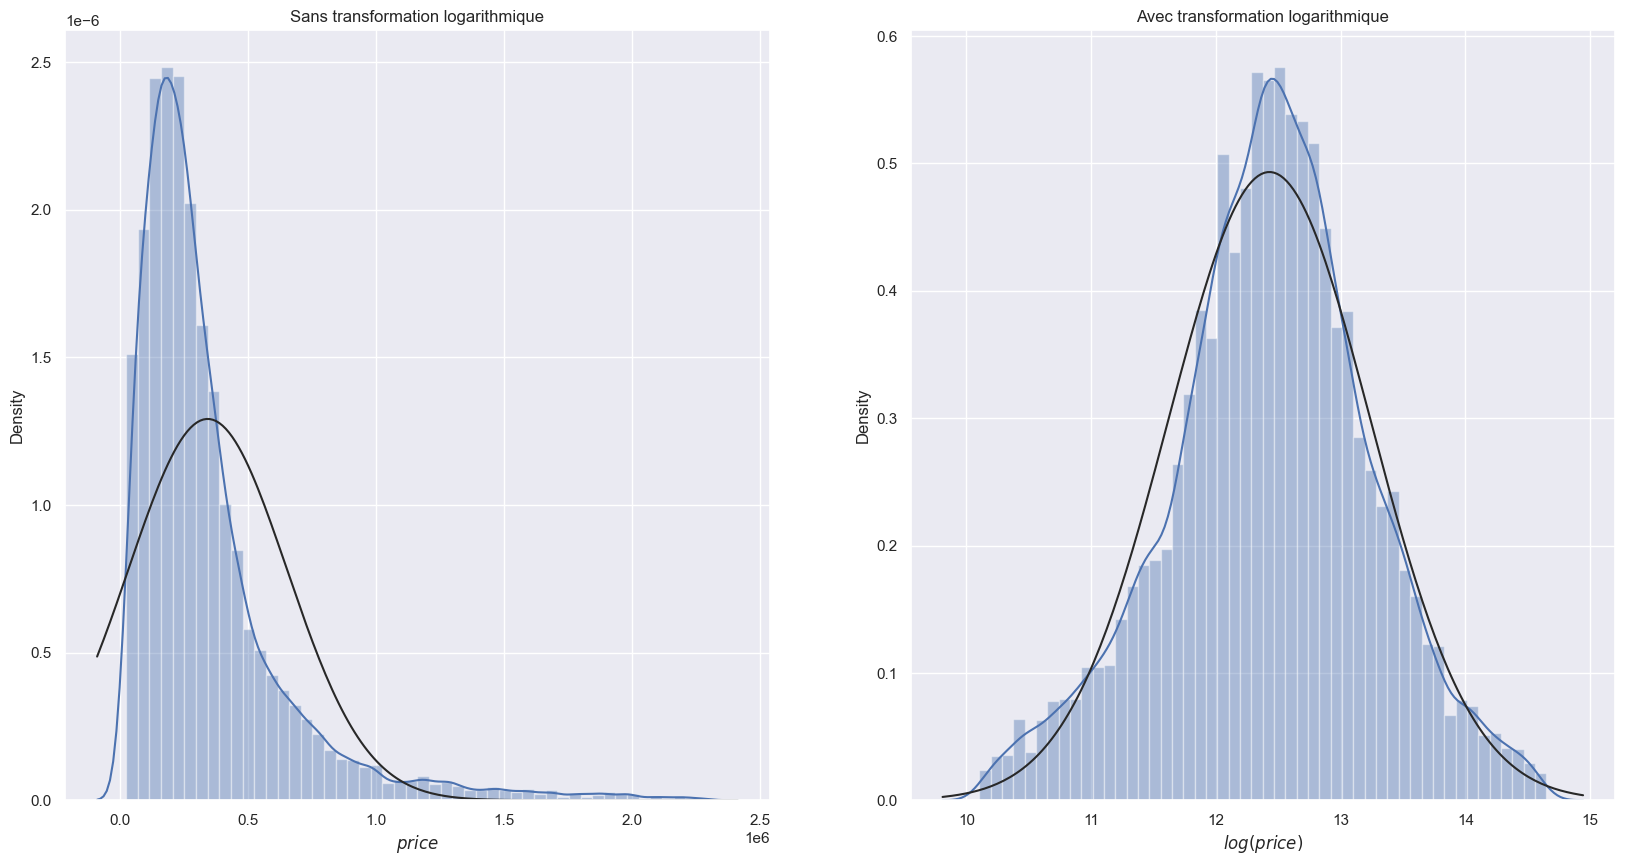

In [16]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sb.distplot(Y_train_id, kde=True, fit=sp.stats.norm)
plt.xlabel("$price$")

plt.title("Sans transformation logarithmique")

plt.subplot(1, 2, 2)
sb.distplot(np.log(Y_train_id), kde=True, fit=sp.stats.norm)
plt.xlabel("$log(price)$")
plt.title("Avec transformation logarithmique")

plt.show()


In [17]:
from sklearn.preprocessing import QuantileTransformer, quantile_transform

y_trans = quantile_transform(
    Y_train_id, n_quantiles=900, output_distribution="normal", copy=True
).squeeze()

/var/folders/5p/x_ln0xd912b29pyd6q752vp40000gn/T/ipykernel_33693/829230558.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(Y_train_id, kde=True, fit=sp.stats.norm)
/var/folders/5p/x_ln0xd912b29pyd6q752vp40000gn/T/ipykernel_33693/829230558.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(y_

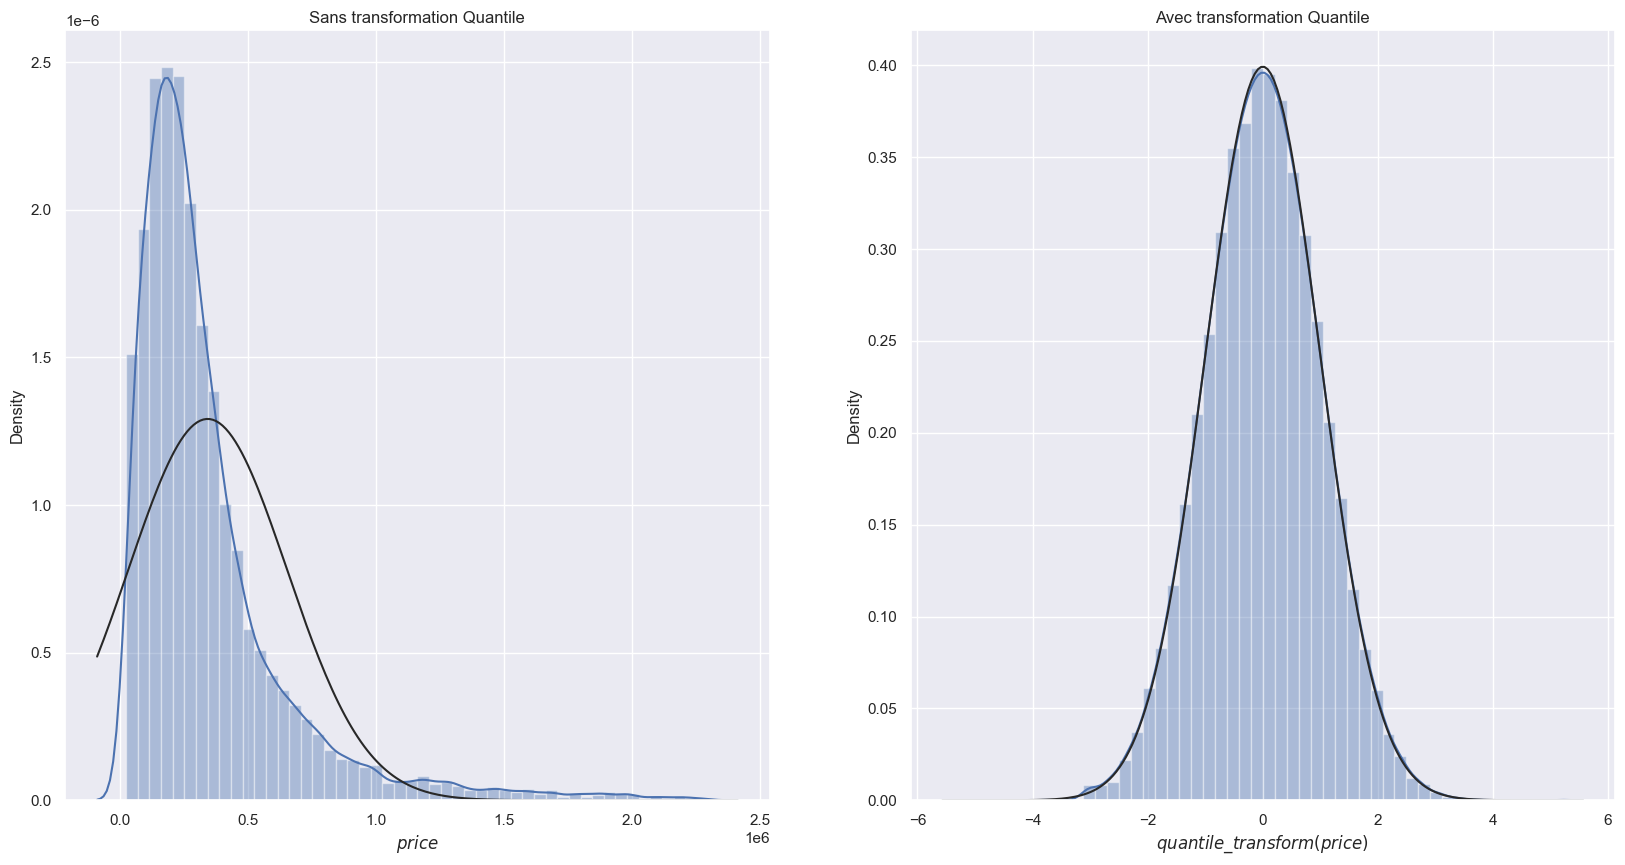

In [19]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sb.distplot(Y_train_id, kde=True, fit=sp.stats.norm)
plt.xlabel("$price$")

plt.title("Sans transformation Quantile")

plt.subplot(1, 2, 2)
sb.distplot(y_trans, kde=True, fit=sp.stats.norm)
plt.xlabel("$quantile\_transform(price)$")
plt.title("Avec transformation Quantile")

plt.show()


In [18]:
Y_train_1=np.log(Y_train_id)
X_train_1=data_5.loc[:X_train_id.index.max(),:]
X_train_1.head()

,approximate_latitude,approximate_longitude,postal_code,size,floor,land_size,energy_performance_value,ghg_value,nb_rooms,nb_bedrooms,...,city_yves,city_yvetot,city_yviers,city_yvoire,city_yvrac,city_yzernay,city_yzeure,city_zetting,city_zillisheim,city_zonza
0,-0.671040,1.339914,-1.098084,-0.322981,NaN,NaN,NaN,NaN,-0.5,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.254732,0.711320,0.212411,-0.155280,3.0,NaN,0.383929,1.285714,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.206042,-1.019220,-0.497085,-0.335404,0.0,-0.290634,NaN,NaN,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.068583,-1.205501,-0.304873,0.167702,0.0,-0.019284,0.330357,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.250017,0.696783,0.208392,-0.167702,3.0,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# corr = pd.concat([X_train_1, Y_train_1], axis=1).corr()
# corr.style.background_gradient(cmap='coolwarm')
# X_test_1=data_5.loc[X_train_0.index.max()+1:,:]
# X_test_1.head()